In [1]:
import mplpub
import numpy as np
from ase import Atoms
from ase.io import read
from ase.spacegroup.symmetrize import FixSymmetry
from ase.units import GPa, kB
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from matplotlib import pyplot as plt, colormaps
from pandas import DataFrame, read_json, concat as pd_concat
from phonopy import load, Phonopy, PhonopyQHA
from phonopy.structure.atoms import PhonopyAtoms
from phonopy.units import Avogadro, EvTokJmol, kb_J, THzToEv
from seekpath import get_explicit_k_path
from tqdm import tqdm

R = kb_J * Avogadro
mplpub.setup(template='acs')

In [3]:
def labels_to_latex(labels_in):
    labels = [r'$\UG{\Gamma}$' if m == 'GAMMA' else m for m in labels_in]
    labels = [m.replace('SIGMA', r'$\UG{\Sigma}$') if m.startswith('SIGMA') else m for m in labels]
    labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
    return labels

In [13]:
colors = {
    'BaZrS3-spg140-I4mcm': 'C0',
    'BaZrS3-spg62-Pnma': 'C1',
    'BaZrS3-spg221-Pm3m': 'C2',
}

labels = {
    'BaZrS3-spg140-I4mcm': 'I4/mcm',
    'BaZrS3-spg62-Pnma': 'Pnma',
    'BaZrS3-spg221-Pm3m': 'Pm-3m'}

In [10]:
structure = read('BaZrS3-spg62-Pnma.xyz')
calc = CPUNEP('nep.txt')
structure.set_calculator(calc)

In [11]:
data = []
for volsc in np.arange(0.9, 1.1, 0.01):
    s = structure.copy()
    s.cell *= volsc ** (1 / 3)  # the cubic root converts from volume strain to linear strain
    s.calc = calc
    relax_structure(s, constant_volume=True)
    data.append(dict(volume=s.get_volume() / len(structure),
                     energy=s.get_potential_energy() / len(structure)))
df_ortho = DataFrame.from_dict(data)

In [12]:
structure = read('BaZrS3-spg140-I4mcm.xyz')
calc = CPUNEP('nep.txt')
structure.set_calculator(calc)

In [13]:
data = []
for volsc in np.arange(0.9, 1.1, 0.01):
    s = structure.copy()
    s.cell *= volsc ** (1 / 3)  # the cubic root converts from volume strain to linear strain
    s.calc = calc
    relax_structure(s, constant_volume=True)
    data.append(dict(volume=s.get_volume() / len(structure),
                     energy=s.get_potential_energy() / len(structure)))
df_tet = DataFrame.from_dict(data)

In [14]:
structure = read('BaZrS3-spg221-Pm3m.xyz')
calc = CPUNEP('nep.txt')
structure.set_calculator(calc)

In [15]:
data = []
for volsc in np.arange(0.9, 1.1, 0.01):
    s = structure.copy()
    s.cell *= volsc ** (1 / 3)  # the cubic root converts from volume strain to linear strain
    s.calc = calc
    relax_structure(s, constant_volume=True)
    data.append(dict(volume=s.get_volume() / len(structure),
                     energy=s.get_potential_energy() / len(structure)))
df_cubic = DataFrame.from_dict(data)

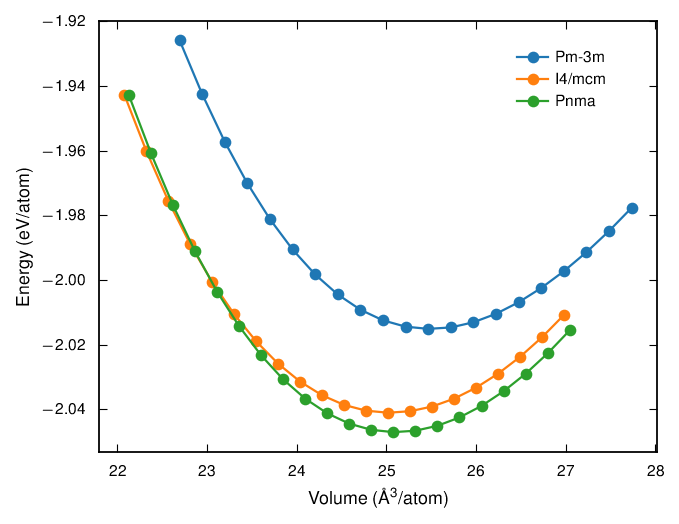

In [21]:
fig, ax = plt.subplots(figsize=(4.5, 3.5), dpi=160)

ax.plot(df_cubic.volume, df_cubic.energy, 'o-', label='Pm-3m')
ax.plot(df_tet.volume, df_tet.energy, 'o-', label='I4/mcm')
ax.plot(df_ortho.volume, df_ortho.energy, 'o-', label='Pnma')
ax.set_xlabel('Volume (Å$^3$/atom)')
ax.set_ylabel('Energy (eV/atom)')

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
fig.savefig('e-v_curves.png')